# In class exercise...Mutual Information

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

## Load in the eeg data from previous tutorials...
* `data` is a trials x time matrix of EEG responses
* `sr` is the sample rate
* `tx` is the time associated with each sample on each trial

In [2]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
data[400:800,:] += 10
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## Make a vector that labels each trial as coming from experimental conditions 1,2,3,4
* Figure out how many trials there are in the data set (let's call that `N`). 
* Divide that by 4
* then make a vector (call it `cond`) that has N/4 1s, followed by N/4 2s, followed by N/4 3s, followed by N/4 4s (I would suggest using `np.hstack` and `np.ones` to achieve this but there are many ways...)


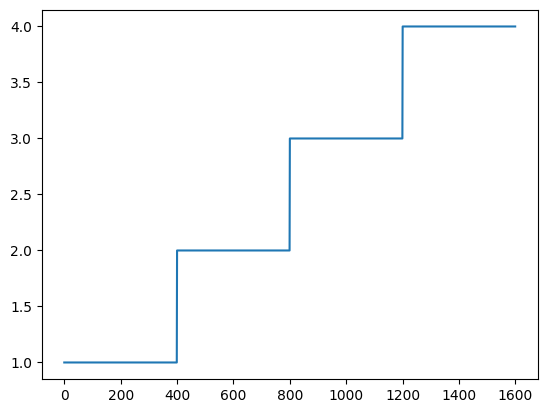

In [3]:
N = data.shape[0]
num_conds = 4
per_cond = N//num_conds

conds = []
for i in range(1, 5):
    conds = np.hstack((conds, i*np.ones(per_cond)))
    
plt.plot(conds)
plt.show()

## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

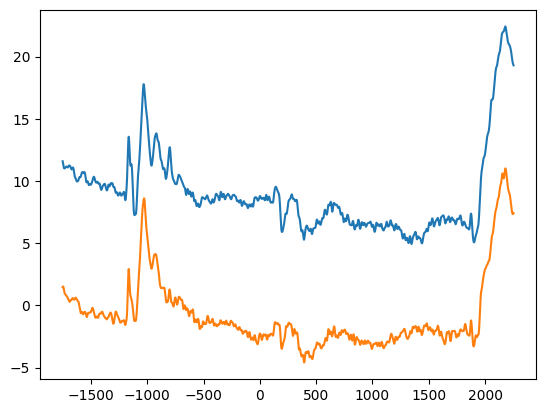

In [4]:
cond2 = data[np.where(conds == 2)[0]]
cond3 = data[np.where(conds == 3)[0]]

cond2 = np.mean(cond2, axis=0)
cond3 = np.mean(cond3, axis=0)

plt.plot(tx, cond2)
plt.plot(tx, cond3)
plt.show()

## Then compute the MI between evoked responses and experimental condition in a specific time window from 1000ms to 1500ms post-stimulus onset (so >= 1000 and <1500)
* You have one discrete variable (cond, or experimental condition label)
* You have the EEG data from each condition, which is a continuous variable
* First compute the mean response across the time window for each trial of condition 2. This should give you a 400 element array with the mean from each trial across the time window. 
* Then compute the mean response across the time window for each trial of condition 3. 
* Then concatenate the two 400 element arrays to make one 800 element array
* You might also want to create a new set of labels for each trial in your new concatenated array - can relabel conds 2 and 3 with a 0 and 1 for ease of looping...so it would have 400 0's followed by 400 1's
* Use only 10 bins for discretizing the continuous EEG data...
* Then compute the MI between experimental condition and EEG responses

#### first compute means over time window for conds 2 and 3, stack up...

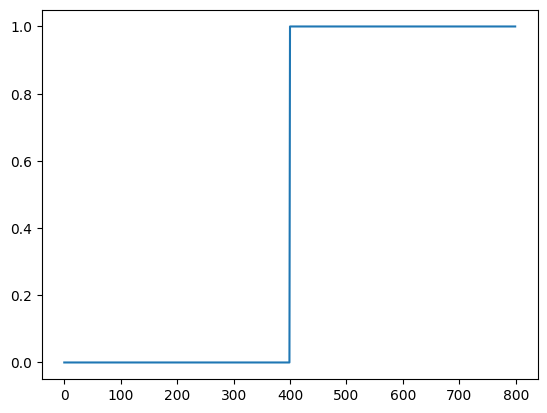

In [5]:
cond2 = data[np.where(conds == 2)[0]]
cond3 = data[np.where(conds == 3)[0]]

cond2_clipped = cond2[:, (tx >= 1000)&(tx < 1500)]
cond3_clipped = cond3[:, (tx >= 1000)&(tx < 1500)]

cond2_clipped = np.mean(cond2_clipped, axis=1)
cond3_clipped = np.mean(cond3_clipped, axis=1)

clipped = np.hstack((cond2_clipped, cond3_clipped))

new_num_labels = 2
new_conds = np.hstack((np.zeros(clipped.size//new_num_labels), np.ones(clipped.size//new_num_labels)))
plt.plot(new_conds)

#### then make new labels...400 zeros stacked on top of 400 ones

In [6]:
# Already done above

#### now compute MI!

In [7]:
# Using 10 bins as stated above.
nbins = 10
edges = np.histogram_bin_edges(clipped, nbins)

bin_y = np.digitize(clipped, edges)
MI = mutual_info_score(new_conds, bin_y) * np.log2(np.e)
MI

0.3528663031080504

In [8]:
bin_y.shape

(800,)

## Does that number seem kinda low given the visual separation of the mean responses you plotted above? Plot some histograms of the data from condition 2 vs condition 3...how much overlap is there? Does the MI value you computed now seem more reasonable? 

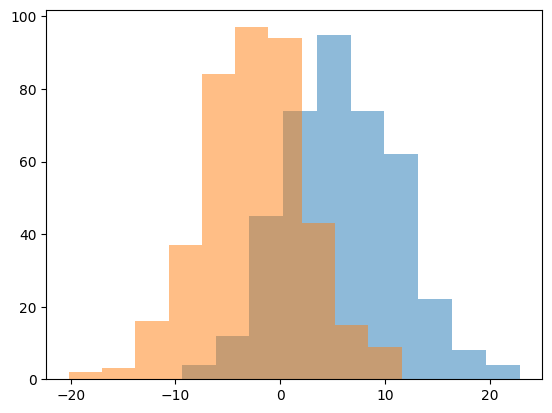

In [10]:
plt.hist(clipped[new_conds==0], alpha=0.5)
plt.hist(clipped[new_conds==1], alpha=0.5)
plt.show()

## Challenge question: How "good" is that MI value? What is the max value it could take in this scenario? How might you compute a `normalized` MI metric that tells you how much information there is relative to that max value? 

Normalized Mutual Information: $MI_{norm} = MI/H_x$

## 